## Import

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

## Data preparation

In [161]:
clean_df = pd.read_csv('../data/processed/video_data_processed.csv')

In [162]:
clean_df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year
36693,d6BoY7ebtOQ,Stefanovic,Quitting my job to travel the world and chase ...,Escaping the 9-5 is something I have thought a...,(notag),2021-02-15 17:27:39+00:00,3748,238,50,642,hd,False,17,15,0,2,2021
3162,FvamL5oA_EE,sentdex,Joining 30 year mortgage rate - p.13 Data Anal...,Welcome to Part 13 of our Data Analysis with P...,Pandas|Python (Programming Language)|Data Anal...,2015-10-27 14:21:52+00:00,22936,206,41,1003,hd,False,14,27,1,10,2015
27285,M3oN7nALq0s,Databricks,How socat and UNIX Pipes Can Help Data Integra...,Nearly every developer is familiar with creati...,Databricks,2022-07-19 16:18:01+00:00,333,6,0,1918,hd,False,16,19,1,7,2022
38681,z-uSBE8Pxwg,"Arpan Gupta Data Scientist, IITian",How to fit a SARIMA Model on time series data,ARIMA (Autoregressive Integrated Moving Averag...,ARIMA|SARIMA|time series|AR|MA|Auto regressive...,2020-02-24 07:00:11+00:00,24176,280,26,2018,hd,False,7,24,0,2,2020
3702,gzv183G9Vew,sentdex,How to send an email with Python,This tutorial covers how to send a basic email...,Python (Software)|How-to (Media Genre)|E-mail ...,2013-09-28 14:37:53+00:00,155561,1340,285,424,hd,False,14,28,5,9,2013


## Feature engineering

In [163]:
X = clean_df[['likeCount', 'commentCount', 'hour', 'day', 'month', 'year']]
# Tạo cột nhãn, ví dụ: nếu viewCount lớn hơn một ngưỡng nào đó, coi video đó là phổ biến
threshold_viewCount = clean_df['viewCount'].quantile(0.7)
clean_df['isTrending'] = (clean_df['viewCount'] > threshold_viewCount).astype(int)
y = clean_df['isTrending']

In [164]:
clean_df.sample(5)


,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year,isTrending
11887,Vb_rsBWWJEA,Brandon Foltz,"Statistics 101: Variable Transformations, An I...","In this Statistics 101 video, we experience a ...",brandon foltz|statistics 101|normal distributi...,2021-10-19 14:45:03+00:00,10646,261,4,698,hd,True,14,19,1,10,2021,0
10,vHGRXuOtFnE,Data School,Passthrough some columns and drop others in a ...,"In a ColumnTransformer, you can use the string...",python|machine learning|scikit-learn|data science,2021-09-30 15:29:47+00:00,3910,100,4,191,hd,False,15,30,3,9,2021,0
18486,Xg54m8f5sJI,DataCamp,Spreadsheets Tutorial: Standardizing data,Want to learn more? Take the full course at ht...,SpreadsheetsTutorial|Spreadsheets|Statistics|D...,2020-04-22 11:41:34+00:00,8465,86,5,169,hd,False,11,22,2,4,2020,0
30635,KgCgpCIOkIs,Rishabh Mishra,Python Project for Data Analysis- Exploratory ...,Python project for data analysis- exploratory ...,python project|python in hindi|python project ...,2023-04-08 04:30:09+00:00,309841,10427,773,2642,hd,True,4,8,5,4,2023,1
52520,rGGdwY1FL8w,Analytics India Magazine,Pramod Singh Chief Analytics Officer at Yodlee...,Listen his talk on Democratization of Data.\n\...,cypher2016|analytics india summit,2016-09-23 08:56:38+00:00,280,3,0,1263,hd,False,8,23,4,9,2016,0


## Training model

In [165]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y ,test_size=0.2)
# model = LogisticRegression(solver = 'liblinear',max_iter=1000)
# model.fit(X_train, y_train)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y ,test_size=0.3, random_state= 2023,stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp ,test_size=0.3, random_state= 2023,stratify=y_tmp)

## Evaluation

In [166]:
# model.score(X_valid,y_valid)

## Prediction

In [167]:
# y_pred = model.predict(X_valid)

In [168]:
# precision_score(y_valid,y_pred), recall_score(y_valid,y_pred)

In [169]:
# print(classification_report(y_valid,y_pred))

##### Decision Tree

In [170]:
# decision_Tree = DecisionTreeRegressor()
# decision_Tree.fit(X_train,y_train)


In [171]:
# decision_Tree.score(X_valid,y_valid)

# Baseline Model Comparison


In [172]:
from sklearn.svm import LinearSVC , SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

seed = 2023
models = [
    LinearSVC(random_state=seed, dual=False, max_iter=1000),
    SVC(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

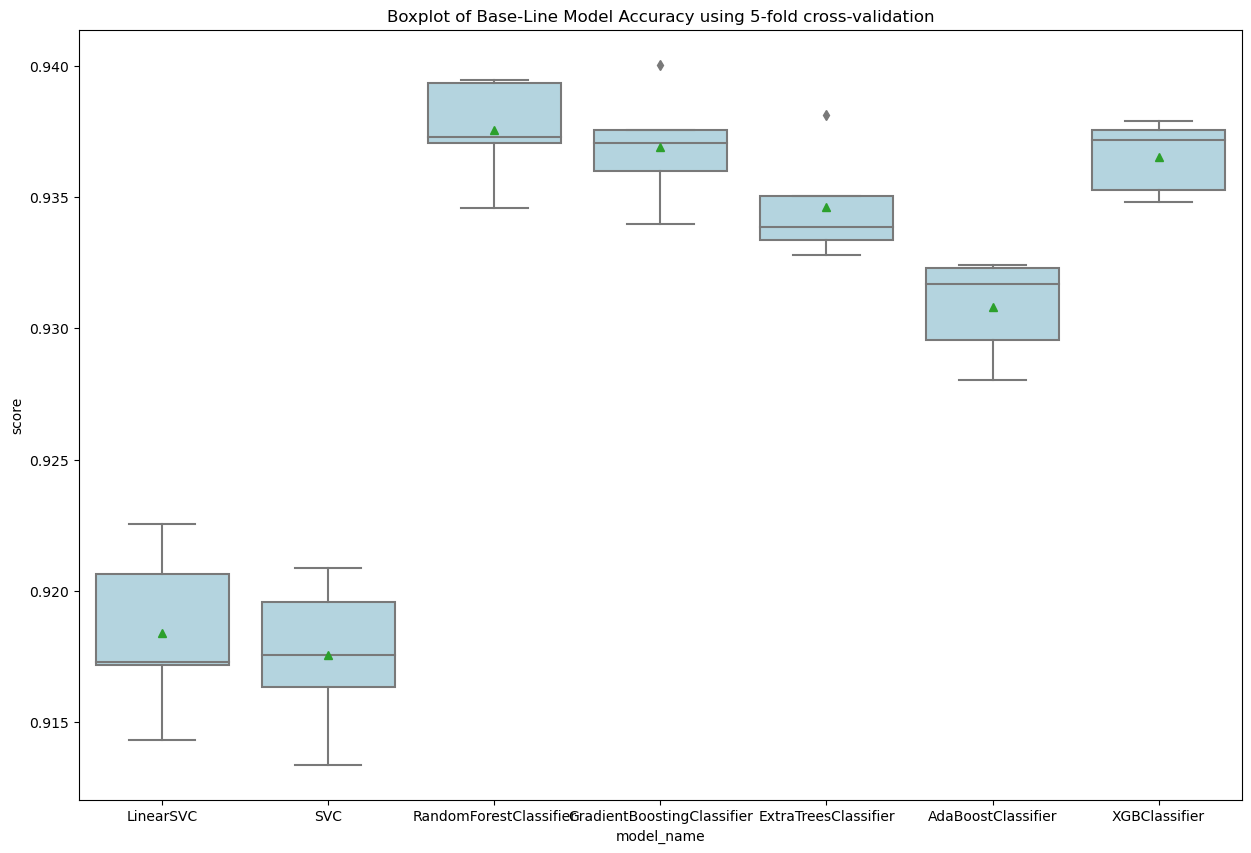

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.937533,0.001995
GradientBoostingClassifier,0.936914,0.002219
XGBClassifier,0.936533,0.001398
ExtraTreesClassifier,0.934629,0.002126
AdaBoostClassifier,0.930798,0.001933
LinearSVC,0.918400,0.003212
SVC,0.917543,0.002910


In [173]:
def generate_baseline_result(models, X, y, metrics, cv=5, plot_result=False):
    # define k-fold
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'score'])
    
    mean = cv_df.groupby('model_name')['score'].mean()
    std = cv_df.groupby('model_name')['score'].std()
    
    baseline_results = pd.concat([mean,std],axis =1, ignore_index=True)
    baseline_results.columns =['Mean','Standard Deviation']
    baseline_results.sort_values(by=['Mean'], ascending = False, inplace = True)
    
    if plot_result:
        plt.figure(figsize=(15, 10))
        sns.boxplot(x ='model_name',y = 'score', data = cv_df, color ='lightblue',showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.show()
    
    return baseline_results

generate_baseline_result(models, X_train, y_train, metrics='accuracy',cv=5,plot_result =True )

# Fine-tune 

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=2023),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_valid, y_valid)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(random_state=2023, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")

Best Model Accuracy: 0.9417783770920917


# Re-train on train + valid set

In [175]:
final_model_train_valid = RandomForestClassifier(random_state=2023, **best_params)

X_train_valid = pd.concat([X_train, X_valid], axis=0)
y_train_valid = pd.concat([y_train, y_valid], axis=0)
final_model_train_valid.fit(X_train_valid, y_train_valid)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=2023)

# Test on test set 

In [176]:
y_pred_final_train_valid = final_model_train_valid.predict(X_test)
accuracy_final_train_valid = accuracy_score(y_test, y_pred_final_train_valid)
print(f"Accuracy of the Final Model on Test Set: {accuracy_final_train_valid}")

Accuracy of the Final Model on Test Set: 0.9411438089950028


# Visualize

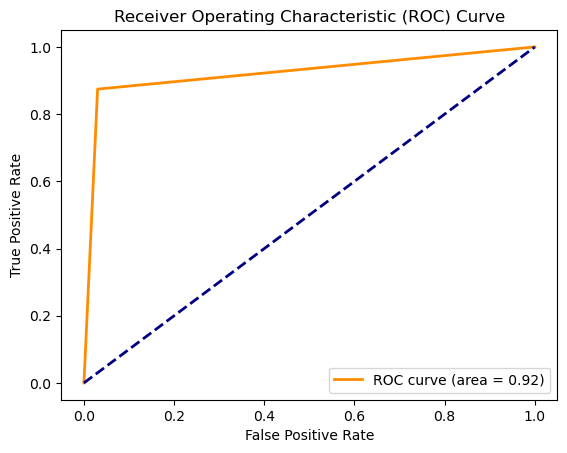

In [177]:
from sklearn.metrics import roc_curve, auc

# Tính false positive rate (fpr) và true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final_train_valid)

# Tính diện tích dưới đường ROC Curve
roc_auc = auc(fpr, tpr)

# Biểu đồ ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

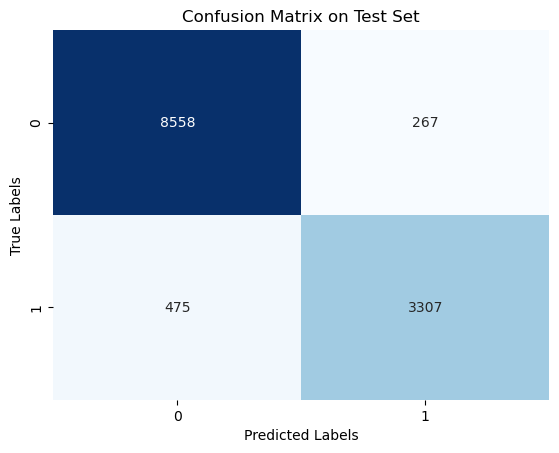

In [178]:
cm = confusion_matrix(y_test, y_pred_final_train_valid)

# Biểu đồ heatmap cho confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Test Set')
plt.show()

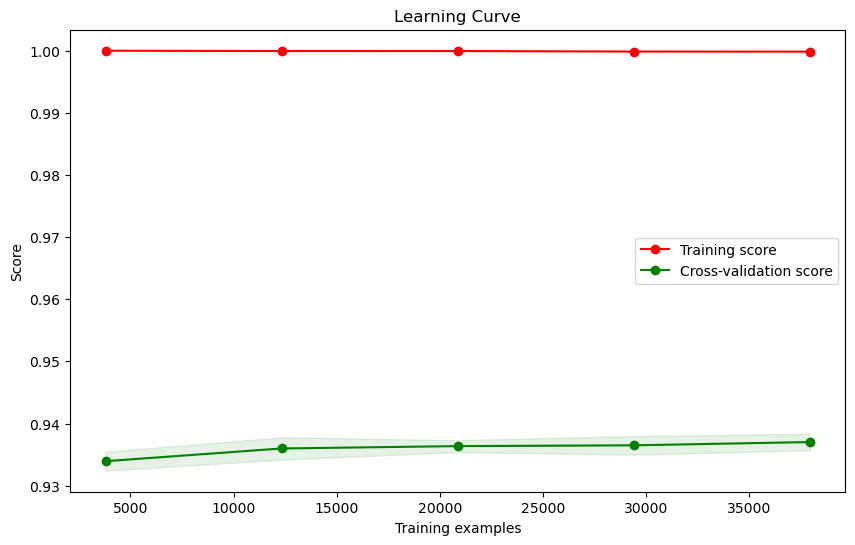

In [179]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1, color="g"
    )

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Định nghĩa mô hình và các thông số cần thiết
model = RandomForestClassifier(random_state=2023, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

# Vẽ đường học tập
plot_learning_curve(model, "Learning Curve", X_train_valid, y_train_valid, cv=cv, n_jobs=-1)
plt.show()